Notebook showing usage of the data detective package.

In [1]:
# To import detective from relative folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import detective.core as detective
import detective.helpers as helpers
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load from a local db, we just need the path

In [2]:
db_path = 'Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db'
DB_URL = 'sqlite:////' + db_path

Alternatively, to load from a cloud database we load from a json file containing the url as the url contains our credentials and we want to lkeep these a secret. To learn how the Google CLoud SQL recorder can be setup checkout https://github.com/robmarkcole/HASS-Google-Cloud-SQL

In [3]:
# For cloud database with secret credentials, load from json. Time to load vaires, up to 3 mins.
#filename = '/Users/robincole/Desktop/hass_db_url.json'
#DB_URL = helpers.load_url(filename)

## Load the db data

We use the DataParser class to load data from the database. This class performs the SQL queries and parses the returned data. The class holds the master pandas dataframe master_df.

In [4]:
%%time
db = detective.HassDatabase(DB_URL)

Successfully connected to sqlite:////Users/robincole/Documents/Home-assistant_database/home-assistant_v2.db
There are 261 entities with data
CPU times: user 494 ms, sys: 1.82 s, total: 2.31 s
Wall time: 9.59 s


In [6]:
db.domains

['sun',
 'binary_sensor',
 'updater',
 'remote',
 'alarm_control_panel',
 'persistent_notification',
 'zone',
 'sensor',
 'device_tracker',
 'input_select',
 'script',
 'automation',
 'light',
 'switch',
 'media_player',
 'camera',
 'group']

In [8]:
db.entities['binary_sensor']

['binary_sensor.motion_at_home',
 'binary_sensor.living_room_motion_sensor',
 'binary_sensor.in_bed_bayesian',
 'binary_sensor.hall_motion_sensor',
 'binary_sensor.bedroom_motion_sensor',
 'binary_sensor.blink_armed_status',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.workday_sensor',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.bayesianbinary']

In [10]:
%%time
db.fetch_all_data()

Querying the database, this could take a while
master_df created successfully.
CPU times: user 7.64 s, sys: 13.7 s, total: 21.3 s
Wall time: 1min 1s


In [12]:
%%time
db.parse_all_data()

CPU times: user 4.38 s, sys: 680 ms, total: 5.06 s
Wall time: 5.18 s


Lets create an object holding the numerical sensor

In [13]:
sensors_num = detective.NumericalSensors(db.master_df)

We can access the list of sensor entities using the list_sensors attribute

In [14]:
sensors_num.entities[0:10]

['sensor.next_train_to_wat',
 'sensor.next_bus_to_new_malden',
 'sensor.darksky_sensor_temperature',
 'sensor.darksky_sensor_precip_probability',
 'sensor.iphone_battery_level',
 'sensor.robins_iphone_battery_level',
 'sensor.blink_blink_camera_percy_temperature',
 'sensor.blink_blink_camera_percy_notifications',
 'sensor.next_train_in',
 'sensor.home_to_waterloo']

Now lets look at the dataframe

In [15]:
sensors_num.data.head()

entity,sensor.average_indoor_temp,sensor.bedroom_light_sensor,sensor.bedroom_temperature,sensor.blink_blink_camera_percy_notifications,sensor.blink_blink_camera_percy_temperature,sensor.bme680air_qual,sensor.bme680humidity,sensor.bme680pressure,sensor.bme680temperature,sensor.breaches_fredallcardgmailcom,...,sensor.next_train_to_wat,sensor.next_train_to_wim,sensor.remote_living_room_button,sensor.robins_iphone_battery_level,sensor.speedtest_download,sensor.volume_used_volume_1,sensor.wipy_humidity,sensor.wipy_memory,sensor.wipy_temperature,sensor.work_to_home
last_changed,,,,,,,,,,,,,,,,,,,,,
2017-10-28 06:48:00.143377,20.2,15621.0,18.89,1.0,21.0,98.51,43.58,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.060922,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.07,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.069416,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.93,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.076784,20.2,15621.0,18.89,1.0,21.0,98.51,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0
2017-10-28 06:48:01.079950,20.2,15621.0,18.89,1.0,21.0,98.54,43.50,1033.95,21.06,0.0,...,1125.0,87.0,1002.0,94.0,36.37,20.7,14.0,38112.0,32.0,25.0


Lets now check for correlations in the data using the all_corrs() method

In [17]:
corrs = sensors_num.correlations()

In [19]:
corrs[(corrs['value'] > 0.75) | (corrs['value'] < -0.75)]

,value
sensor.next_train_in-sensor.next_train_to_wim,0.999961
sensor.iphone_battery_level-sensor.robins_iphone_battery_level,0.923446
sensor.bme680air_qual-sensor.bme680pressure,0.862630
sensor.mean_temperature-sensor.bedroom_temperature,0.814340
sensor.living_room_temperature-sensor.bme680temperature,0.801827
sensor.iphone_battery_level-sensor.volume_used_volume_1,0.753104
sensor.iphone_battery_level-sensor.darksky_sensor_temperature,0.750013
sensor.memory_usage_real-sensor.iphone_battery_level,-0.759882
sensor.iphone_battery_level-sensor.bme680temperature,-0.764391
sensor.bme680pressure-sensor.darksky_sensor_temperature,-0.810146


Unsurprisingly the mean temperature is strongly correlated with all of the temperature sensors. 

Interestingly my iphone battery level is somewhat inversely correlated with the travel time from home to waterloo, which gets longer late at night when my battery level is more likely to be low. 

#### Plot sensor data
Convenience to plot a sensor data.
Pass a single entity to plot:

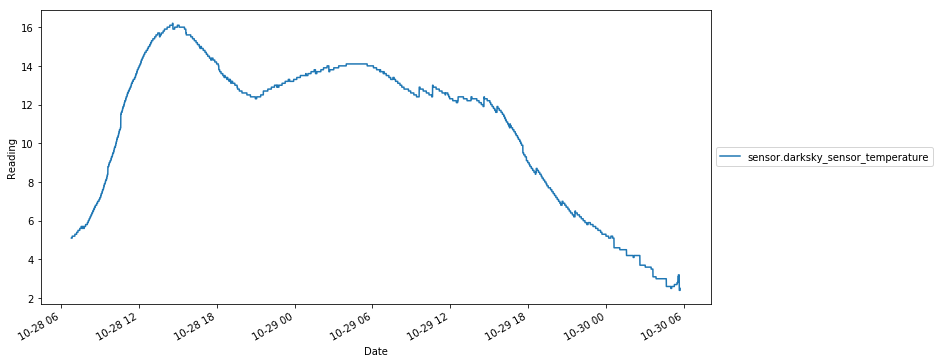

In [20]:
sensors_num.plot('sensor.darksky_sensor_temperature')

Which is equivalent to 

In [21]:
darksky_temperature = sensors_num.data['sensor.darksky_sensor_temperature']

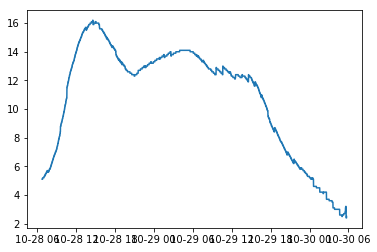

In [22]:
plt.plot(darksky_temperature)

Lets save to csv

In [23]:
darksky_temperature.to_csv('darksky_temperature.csv')

We can pass a list of entities to plot:

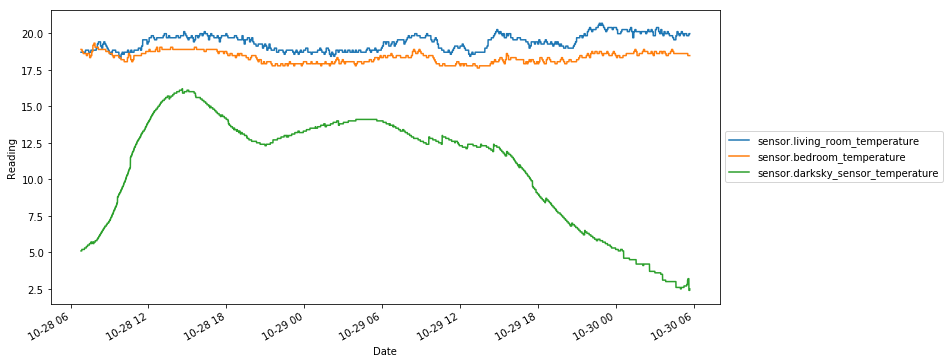

In [24]:
to_plot = ['sensor.living_room_temperature',
           'sensor.bedroom_temperature',
           'sensor.darksky_sensor_temperature']

sensors_num.plot(to_plot)

Even mix up lists and single entites

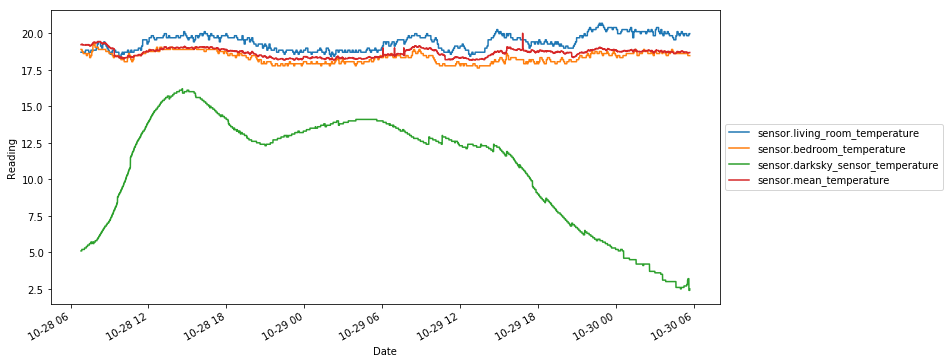

In [25]:
sensors_num.plot(to_plot, 'sensor.mean_temperature')

#### Pairplot
A seaborn pair plot to show correlations.

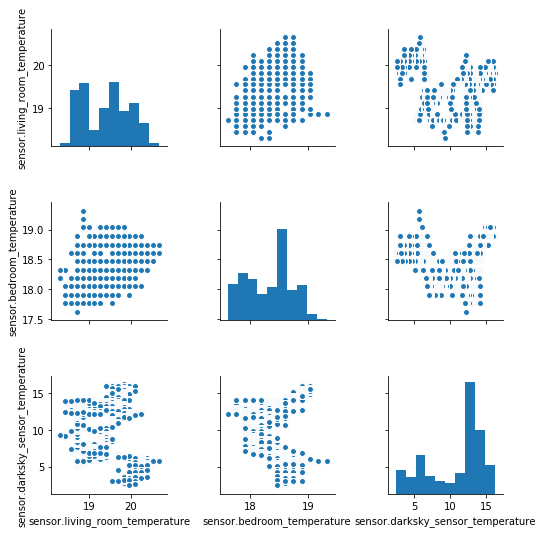

In [26]:
sns.pairplot(sensors_num.data[to_plot]);

## Binary sensors
Class for handling binary sensors with on/off states.

In [27]:
sensors_binary = detective.BinarySensors(db.master_df)

In [28]:
sensors_binary.entities

['binary_sensor.workday_sensor',
 'binary_sensor.blink_blink_camera_percy_motion_enabled',
 'binary_sensor.living_room_nest_protect_online',
 'binary_sensor.blink_armed_status',
 'binary_sensor.hall_motion_sensor',
 'binary_sensor.bedroom_motion_sensor',
 'binary_sensor.living_room_motion_sensor',
 'binary_sensor.motion_at_home',
 'binary_sensor.bayesianbinary',
 'binary_sensor.in_bed_bayesian']

Currently we can plot a single binary sensor with the plot() method

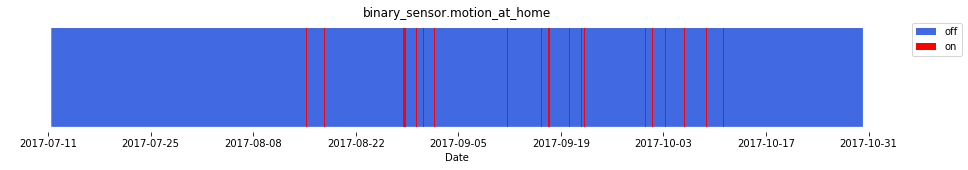

In [29]:
sensors_binary.plot('binary_sensor.motion_at_home')

## Day of week analysis

Lets analyse the **motion_at_home**, create some features for day of week and time category, then analyse motion by these features.

In [30]:
motion_df = sensors_binary.data[['binary_sensor.motion_at_home']] # Must pass a list to return correctly indexed df

In [31]:
motion_df['weekday'] = motion_df.index.weekday_name

In [32]:
motion_df['is_weekday'] = motion_df.index.map(lambda x: helpers.is_weekday(x))

In [33]:
motion_df = motion_df[motion_df['binary_sensor.motion_at_home'] == True] # Keep only true detection events

In [34]:
motion_df['time_category'] = motion_df.index.map(lambda x: helpers.time_category(x))

In [35]:
motion_df.head()

entity,binary_sensor.motion_at_home,weekday,is_weekday,time_category
last_changed,,,,
2017-08-07 20:08:17.810800,True,Monday,True,evening
2017-08-07 20:08:26.921077,True,Monday,True,evening
2017-08-07 20:10:20.017217,True,Monday,True,evening
2017-08-07 20:11:31.024414,True,Monday,True,evening
2017-08-07 20:12:02.027471,True,Monday,True,evening


In [36]:
motion_df['binary_sensor.motion_at_home'].groupby(motion_df['is_weekday']).describe()['count']

is_weekday
False     4452
True     10862
Name: count, dtype: object

In [37]:
motion_df_gb = motion_df['binary_sensor.motion_at_home'].groupby([motion_df['weekday'], motion_df['time_category']]).sum().unstack()
motion_df_gb.fillna(value=0, inplace=True)   # Replace NaN with 0
motion_df_gb = motion_df_gb.astype('int')              # Ints rather than floats
motion_df_gb = motion_df_gb.T
motion_df_gb

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_category,,,,,,,
daytime,1000,690,962,631,844,880,800
evening,394,599,239,496,453,532,545
morning,839,688,1047,833,664,655,619
night,92,93,131,113,163,149,163


TypeError: integer argument expected, got float

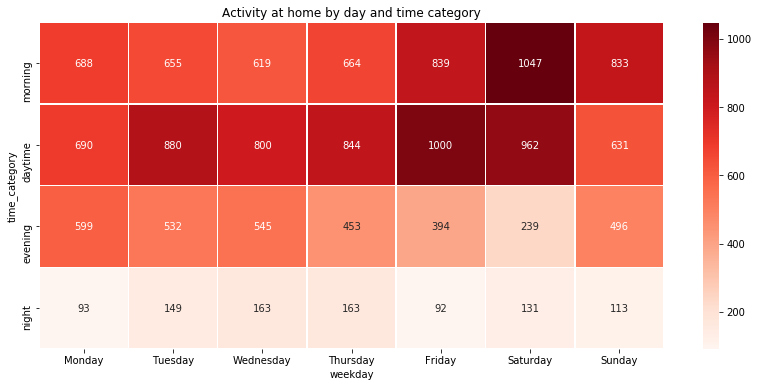

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
times_list = ['morning', 'daytime', 'evening', 'night']
ax = sns.heatmap(motion_df_gb[days_list].loc[times_list], annot=True, linewidths=.5, fmt="d", ax=ax, cmap='Reds');
ax.set_title('Activity at home by day and time category')
fig.savefig('heatmap.jpg')